<img src="https://s3-ap-southeast-1.amazonaws.com/he-public-data/wordmark_black65ee464.png" width="700">

# Day 4 - Question 2


**Reading Assignment:**

- [Qiskit Textbook Chapter 2.3 - Phase Kickback](https://qiskit.org/textbook/ch-gates/phase-kickback.html)
- [Qiskit Textbook Chapter 2.4 - More Circuit Identities](https://qiskit.org/textbook/ch-gates/more-circuit-identities.html)

**Additional Resources:**

- [Qiskit Documentation - Tutorials](https://qiskit.org/documentation/tutorials/circuits/index.html)
- [Qiskit Documentation - Terra Circuit Library](https://qiskit.org/documentation/apidoc/circuit_library.html)
- [Qiskit Tutorial - Advanced Circuit Visualization](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits_advanced/3_advanced_circuit_visualization.ipynb)

**For the Curious:**

- [Circuit Sessions - Qiskit Circuit Library](https://www.youtube.com/watch?v=SsXJgAZ6aIg)
- [Circuit Sessions - Transpiling Quantum Circuits](https://www.youtube.com/watch?v=2T3163VjvWQ)




In [Chapter 2, Section 2.3](https://qiskit.org/textbook/ch-gates/phase-kickback.html) of the qiskit textbook we learned how to add phase into the system by using a control gate utilizing the idea of phase kickback. 


## Question: Modify the output of `init_circuit()` such that the system is transformed to $|\circlearrowright\rangle\otimes|1\rangle$  using only a single [`ControlledU3`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CU3Gate.html) gate

Where the state 

$$|\circlearrowright\rangle = \frac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$$

In [1]:
%matplotlib inline

# defining a magic function for creating the submission file.
from IPython.core.magic import register_cell_magic
@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)
    
# Importing Qiskit visualization libraries 
from qiskit.tools.jupyter import *
from qiskit.visualization import *

Now that we have imported what we require lets build our circuit in the `build_state()` function where we have already initialized a `QuantumCircuit` for two qubits. Your task is to add necessary gates as specified in the question and return the quantum circuit. In the case that you require classes that haven't already been imported include them in the space given below for importing libraries.

**Note:** 
* Do not change the name of the functions `build_state()` and `init_circuit()`. 
* Do not make any changes inside `init_circuit()`. 

In [22]:
%%write_and_run answer_day4_question2.py

### WRITE YOUR CODE BETWEEN THESE LINES - START
    
# import libraries that are used in the functions below.
from qiskit import QuantumCircuit
import numpy as np
    
### WRITE YOUR CODE BETWEEN THESE LINES - END

def init_circuit():
    
    # create a quantum circuit on two qubits
    qc = QuantumCircuit(2)

    # initializing the circuit
    qc.h(0)
    qc.x(1)
    return qc

# The initial state has been defined above. 
# You'll now have to apply necessary gates in the build_state() function to convert the state as asked in the question.

def build_state():
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    
    # the initialized circuit
    circuit = init_circuit()
    
    # apply a single cu3 gate
    circuit.cu3(0,-np.pi/2,0,0,1)
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    return circuit

**Circuit Diagram**

In [23]:
my_circuit = build_state()
my_circuit.draw()

┌───┐                 
q_0: ┤ H ├────────■────────
     ├───┤┌───────┴───────┐
q_1: ┤ X ├┤ U3(0,-pi/2,0) ├
     └───┘└───────────────┘

**Bloch Sphere**

Lets run the circuit we've built using a `statevector_simulator` and look at its state on a bloch sphere. Bloch sphere is ideal when you have to look at the state of a single qubit. And a Qsphere is used to visualize multiqubit states, however, we can also use multiple bloch spheres for each qubit. As you may expect the multiple bloch sphere approach doesn't work when the state is not [separable](https://en.wikipedia.org/wiki/Separable_state). You can check out the documentation [here](https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html) for more plotting options.

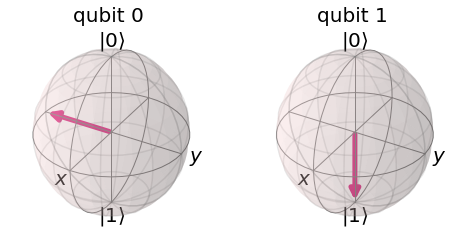

In [24]:
# importing the simulator
from qiskit import execute, Aer

backend = Aer.get_backend("statevector_simulator")
job = execute(my_circuit,backend=backend)
statevector = job.result().get_statevector()
plot_bloch_multivector(statevector)